<h1>AI in Orthopaedics Hackathon 2024</h1>
<h3> Competition Solution (Bonus Challenge Attempted) </h3>
<h3> Tsz Shun Max Chang, Wang Yui Henry To, Mohammed Jafer Ali, Sukhraj Virdee </h3>

In [1]:
# Import dataset and all necessary libraries
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

vertebral_column = fetch_ucirepo(id=212) 

X = vertebral_column.data.features 
y = vertebral_column.data.targets 

# Set seed value for all training
SEED = 42

In [2]:
''' Full Dataset with Classification '''
pd.concat([X,y], axis=1)

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia
...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal


In [3]:
''' Data Cleansing '''

# Classify class data into either Normal (0) or Abnormal (1)
binary_y = pd.DataFrame(np.where(y =='Normal', 0, 1))

# Split training and testing data randomly (80-20 split)
X_train = X.sample(frac=0.8, random_state=SEED)
y_train = binary_y.sample(frac=0.8, random_state=SEED)

X_test = X.loc[X.index.difference(X_train.index)]
y_test = binary_y.loc[binary_y.index.difference(y_train.index)]

# Reformat class data into suitable NumPy arrays
y_train = y_train.to_numpy().reshape(-1)
y_test = np.array(y_test).ravel()

In [4]:
''' Implementation of the Logistic Regression Model (v1) '''

class LogisticRegressionV1():

    '''
    Initialise the model.

    -params
    lr (float): Learning rate (or step size) of loss functions.
    max_epoch (int): Maximum number of epoch.
    thres (float): The classification threshold for binary classification.
    '''
    def __init__(self, lr=0.001, max_epoch=1000):
        self.lr = lr
        self.max_epoch = max_epoch
        self.thres = 0.5
        self.weights = None
        self.bias = 0

    ''' Sigmoid Function.
    -params
    x (DataFrame): Linear combination of training data.
    -return
    DataFrame with updated probabilites. '''
    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    ''' Fits model with given training data.
    -params
    X (DataFrame): Training vector
    y (Array): Class vector '''
    def fit(self, X, y):
        samples, features = X.shape
        # Initialise 0 weight for each dimension. 
        # (Set data type to float64 to prevent precision loss)
        self.weights = np.zeros(features, dtype=np.float64) 

        for _ in range(self.max_epoch+1):
            # Calculate w_t*x + b and apply sigmoid function.
            linear_prediction = np.dot(X, self.weights) + self.bias
            prediction = self._sigmoid(linear_prediction)
            
            # Calculate weight and bias gradient.
            dw = (1/samples) * np.dot(X.T, (prediction - y))
            db = (1/samples) * np.sum(prediction - y)

            # Calculate new weights and bias.
            self.weights = self.weights - self.lr*dw
            self.bias = self.bias - self.lr*db

    ''' Predicts classification with test data.
    -params
    X (DataFrame): Testing vector.
    -return
    Array of class predictions.
    '''
    def predict(self, X):
        linear_prediction = np.dot(X, self.weights) + self.bias
        prediction = self._sigmoid(linear_prediction)
        # Classify predictions as either Normal or Abnormal
        # according to the classification threshold.
        class_pred = np.array([0 if p <= self.thres else 1 for p in prediction])
        
        return class_pred

    ''' Determines accuracy of classification.
    -params
    X (DataFrame): Testing vector.
    y (Array): Class vector.
    -return
    Float of percentage accuracy.
    '''
    def accuracy(self, X, y):
        prediction = self.predict(X)
        return np.sum(prediction==y)/len(y)

    ''' Getter for weights.
    -return 
    An array of weights for each dimension.'''
    def get_weights(self):
        return self.weights

    ''' Getter for bias.
    -return 
    A float representing the bias value.'''
    def get_bias(self):
        return self.bias
        

In [5]:
''' Initialise Logistic Regression Model v1'''
logit_model = LogisticRegressionV1()

# Fit and predict outcome with training and testing data respectively
logit_model.fit(X_train, y_train)
prediction = logit_model.predict(X_test)

# Calculate accuracy of test
accuracy = logit_model.accuracy(X_test, y_test)

print(f'Accuracy: {accuracy*100:.2f}%')

Accuracy: 83.87%


- The first version of this model produces classification accuracy of 77.42%, below is further data analysis on our inital result. Let's take a deeper look into the results.

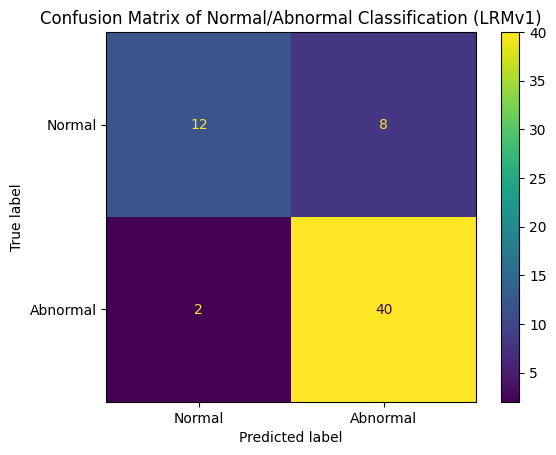

In [6]:
''' Analysis: Confusion Matrix'''
cm = confusion_matrix(y_test, prediction)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Normal','Abnormal'])

disp.plot()
plt.title('Confusion Matrix of Normal/Abnormal Classification (LRMv1)')
plt.show()

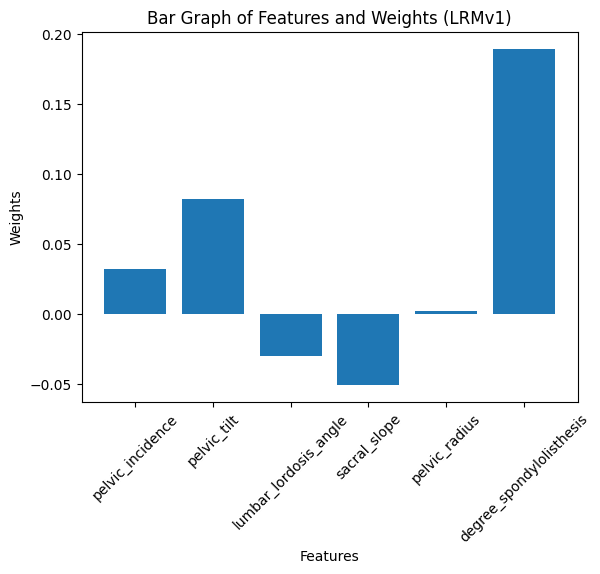

In [7]:
''' Analysis: Weighting of Features '''
weights = logit_model.get_weights()
features_label = X.columns.tolist()

# Correspond each feature name with its weight
feature_weights = dict(zip(features_label, weights))

plt.bar(feature_weights.keys(), feature_weights.values())

plt.title('Bar Graph of Features and Weights (LRMv1)');
plt.xlabel('Features');plt.ylabel('Weights');
plt.xticks(rotation=45);

plt.show()

In [8]:
weights = logit_model.get_weights()
bias = logit_model.get_bias()

weights_df = pd.DataFrame([weights],columns=X.columns.tolist())

print('Weights:\n')
print(weights_df.to_string(index=False))
print('\n')
print(f'Bias: {bias}')

Weights:

 pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope  pelvic_radius  degree_spondylolisthesis
         0.031797     0.082397              -0.030277       -0.0506       0.002147                  0.189567


Bias: 0.008453241736611404


<h3>Changes made in model 2:</h3>

- lr changed from 1e-2 to 1e-3
- max_epoch changed from 1000 to 10000
- Added tolerance of 0.01
- Added delta weights coefficient matrix
- Added delta bias coefficient vector
- Added tolerance check for dw and db
- Added iteration variable to track no. of iterations

In [9]:
''' Implementation of the Logistic Regression Model (v2) '''

class LogisticRegressionV2():

    '''
    Initialise the model.

    -params
    lr (float): Learning rate (or step size) of loss functions.
    max_epoch (int): Maximum number of epoch.
    tol (float): Tolerance level of weights and bias.
    '''
    def __init__(self, lr=0.0001, max_epoch=10000 , tol=0.01):
        self.lr = lr
        self.max_epoch = max_epoch
        self.weights = None
        self.tol = tol
        self.bias = 0 # Initial bias 
        self.dw_coeff_m = [] # Coefficient matrix of delta weights at each time step
        self.db_coeff = [] # Coefficient vector of delta bias at each time step
        self.iterations = 0 # Track number of iterations
        

    ''' Sigmoid Function.
    -params
    x (DataFrame): Linear combination of training data.
    -return
    DataFrame with updated probabilites. '''
    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    ''' Fits model with given training data.
    -params
    X (DataFrame): Training vector
    y (Array): Class vector 
    weights (Array): Custom initial weights for each feature.'''
    
    def fit(self, X, y, weights=None):
        samples, features = X.shape
        # Initialise 0 weight for each dimension. 
        # (Set data type to float64 to prevent precision loss)
        if weights is None:
            self.weights = np.zeros(features, dtype=np.float64)
        else:
            self.weights = weights

        for i in range(self.max_epoch+1):
            # Calculate w_t*x + b and apply sigmoid function.
            linear_prediction = np.dot(X, self.weights) + self.bias
            prediction = self._sigmoid(linear_prediction)
            
            # Calculate weight and bias gradient.
            dw = (1/samples) * np.dot(X.T, (prediction - y))
            db = (1/samples) * np.sum(prediction - y)

            # Check if gradient is below tolerance threshold.
            if np.all(np.abs(dw) <= self.tol) and np.abs(db) <= self.tol:
                break
                
            # Calculate new weights and bias.
            self.weights = self.weights - self.lr*dw
            self.bias = self.bias - self.lr*db

            # Store weights of current time step
            self.dw_coeff_m.append(dw)
            self.db_coeff.append(db)
        self.iterations = i

    ''' Predicts classification with test data.
    -params
    X (DataFrame): Testing vector.
    thres (float): The classification threshold for binary classification.
    -return
    Array of class predictions.'''
    def predict(self, X, thres=0.5):
        linear_prediction = np.dot(X, self.weights) + self.bias
        prediction = self._sigmoid(linear_prediction)
        # Classify predictions as either Normal or Abnormal
        # according to the classification threshold.
        class_pred = np.array([0 if p <= thres else 1 for p in prediction])
        
        return class_pred

    ''' Determines accuracy of classification.
    -params
    X (DataFrame): Testing vector.
    y (Array): Class vector.
    -return
    Float of percentage accuracy.
    '''
    def accuracy(self, X, y):
        prediction = self.predict(X)
        return np.sum(prediction==y)/len(y)

    ''' Getter for weights.
    -return 
    An array of weights for each dimension.'''
    def get_weights(self):
        return self.weights

    ''' Getter for bias.
    -return 
    A float representing the bias value.'''
    def get_bias(self):
        return self.bias

    ''' Getter for delta weights.
    -return 
    An matrix of delta weights for each time step.'''
    def get_d_weights(self):
        return self.dw_coeff_m

    ''' Getter for delta bias.
    -return 
    A vector of delta bias for each time step.'''
    def get_d_bias(self):
        return self.db_coeff

    ''' Getter for number of iterations in the algorithm.
    -return
    An integer of number of iterations.'''
    def get_iters(self):
        return self.iterations
        

In [10]:
''' Initialise Logistic Regression Model v2'''
logit_model = LogisticRegressionV2()

custom_weights = [1,0,0,0,0,1] 

# Fit and predict outcome with training and testing data respectively
logit_model.fit(X_train, y_train, weights=custom_weights)
prediction = logit_model.predict(X_test)

In [11]:
# Display statistics such as iterations, final weights and bias, final dw and db
print(f'Iterations: {logit_model.get_iters()}\n')

weights = logit_model.get_weights()
bias = logit_model.get_bias()

weights_df = pd.DataFrame([weights],columns=X.columns.tolist())

print('Weights:\n')
print(weights_df.to_string(index=False))
print('\n')
print(f'Bias: {bias}\n')

# Get final values of deltas
d_weights = logit_model.get_d_weights()[-1]
d_bias = logit_model.get_d_bias()[-1]

d_weights_df = pd.DataFrame([d_weights],columns=X.columns.tolist())
print('Delta Weights:\n')
print(d_weights_df.to_string(index=False))
print('\n')
print(f'Delta Bias: {d_bias}\n')

# Calculate accuracy of test
accuracy = logit_model.accuracy(X_test, y_test)
print(f'Accuracy: {accuracy*100:.2f}%')

Iterations: 10000

Weights:

 pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope  pelvic_radius  degree_spondylolisthesis
          0.42015    -0.178207              -0.142642     -0.401644      -0.003933                  0.383578


Bias: 0.004224810024854507

Delta Weights:

 pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope  pelvic_radius  degree_spondylolisthesis
         0.119971     0.144409              -0.234593     -0.024438      -0.002786                  0.503648


Delta Bias: -0.006263840206450872

Accuracy: 85.48%


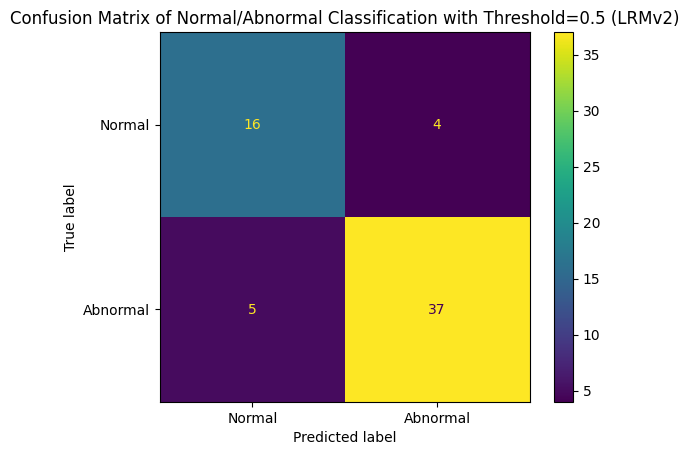

In [12]:
''' Analysis: Confusion Matrix with Threshold = 0.5'''
cm = confusion_matrix(y_test, prediction)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Normal','Abnormal'])

disp.plot()
plt.title('Confusion Matrix of Normal/Abnormal Classification with Threshold=0.5 (LRMv2)')
plt.show()

- With this new model, bottom False Positives have significantly decreased.

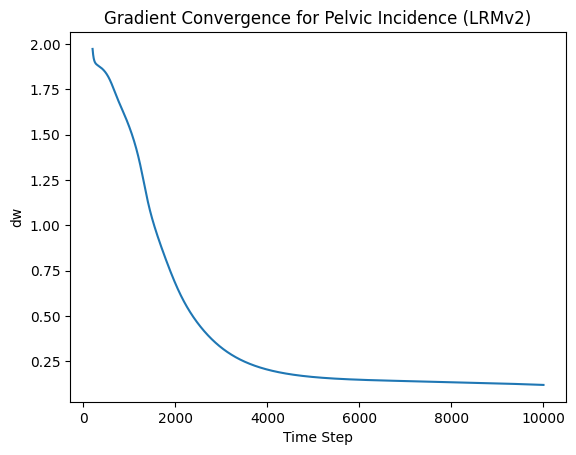

In [13]:
''' Analysis: Gradient Convergence of features '''
d_weights = logit_model.get_d_weights()
# Convert weights matrix into a DataFrame
d_weights_df = pd.DataFrame(d_weights, columns=features_label)

# Discard first 200 iterations due to burn-in
plt.plot(d_weights_df['pelvic_incidence'][200:])

plt.title('Gradient Convergence for Pelvic Incidence (LRMv2)');
plt.xlabel('Time Step'); plt.ylabel('dw');
plt.show()

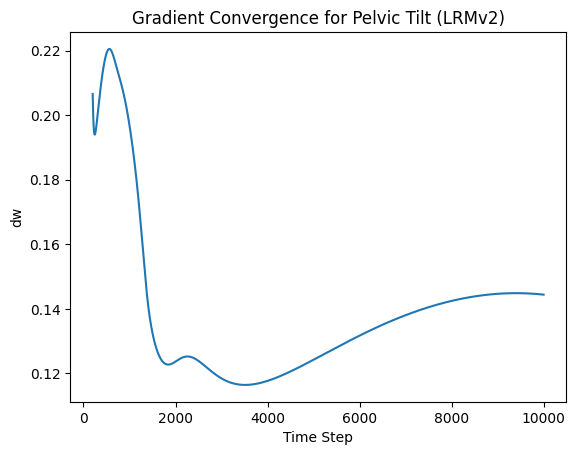

In [14]:
plt.plot(d_weights_df['pelvic_tilt'][200:])

plt.title('Gradient Convergence for Pelvic Tilt (LRMv2)');
plt.xlabel('Time Step'); plt.ylabel('dw');

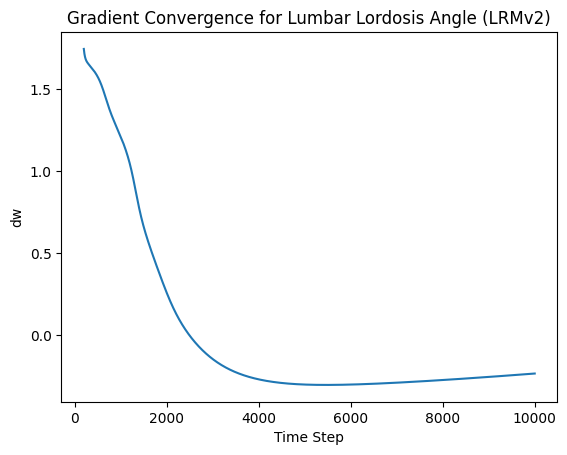

In [15]:
plt.plot(d_weights_df['lumbar_lordosis_angle'][200:])

plt.title('Gradient Convergence for Lumbar Lordosis Angle (LRMv2)');
plt.xlabel('Time Step'); plt.ylabel('dw');

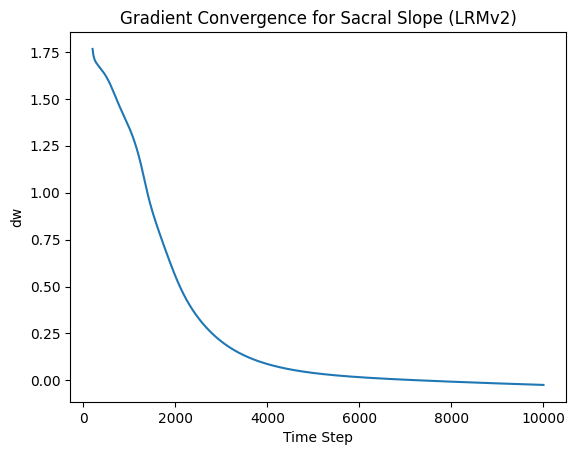

In [16]:
plt.plot(d_weights_df['sacral_slope'][200:])

plt.title('Gradient Convergence for Sacral Slope (LRMv2)');
plt.xlabel('Time Step'); plt.ylabel('dw');

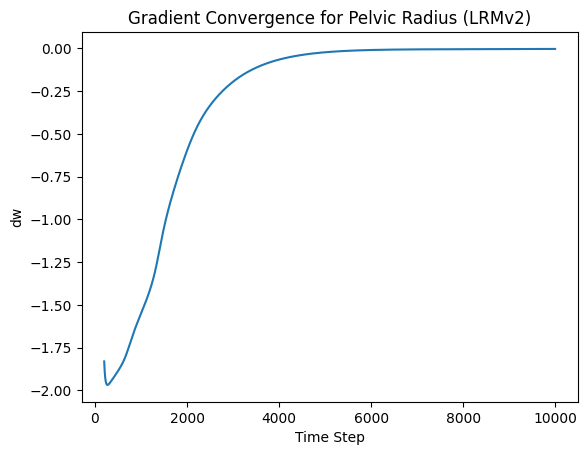

In [17]:
plt.plot(d_weights_df['pelvic_radius'][200:])

plt.title('Gradient Convergence for Pelvic Radius (LRMv2)');
plt.xlabel('Time Step'); plt.ylabel('dw');

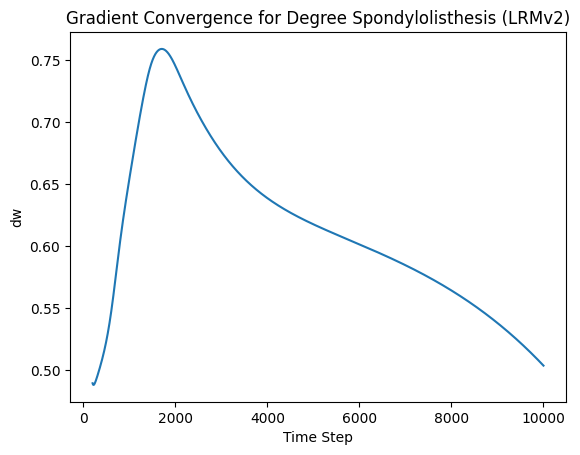

In [18]:
plt.plot(d_weights_df['degree_spondylolisthesis'][200:])

plt.title('Gradient Convergence for Degree Spondylolisthesis (LRMv2)');
plt.xlabel('Time Step'); plt.ylabel('dw');


<h3>Analysis of gradient convergence</h3>

- Burn in discarded as the first n iterations do not reflect the convergence behaviour
- Magnitude is successfully being reduced (tending towards 0.00 as t -> inf)
- Tolerance threshold is not hit yet (more iterations required / slower learning rate)


- The max epoch has now been increased to 30000, aiming to reach convergence within tolerance level of 0.01

In [19]:
''' Implementation of the Logistic Regression Model (v3) '''

class LogisticRegressionV3():

    '''
    Initialise the model.

    -params
    lr (float): Learning rate (or step size) of loss functions.
    max_epoch (int): Maximum number of epoch.
    tol (float): Tolerance level of weights and bias.
    '''
    def __init__(self, lr=0.0001, max_epoch=10000 , tol=0.01):
        self.lr = lr
        self.max_epoch = max_epoch
        self.weights = None
        self.tol = tol
        self.bias = 0 # Initial bias 
        self.dw_coeff_m = [] # Coefficient matrix of delta weights at each time step
        self.db_coeff = [] # Coefficient vector of delta bias at each time step
        self.iterations = 0 # Track number of iterations
        

    ''' Sigmoid Function.
    -params
    x (DataFrame): Linear combination of training data.
    -return
    DataFrame with updated probabilites. '''
    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    ''' Fits model with given training data.
    -params
    X (DataFrame): Training vector
    y (Array): Class vector 
    weights (Array): Custom initial weights for each feature'''
    
    def fit(self, X, y, weights=None):
        samples, features = X.shape
        # Initialise 0 weight for each dimension. 
        # (Set data type to float64 to prevent precision loss)
        if weights is None:
            self.weights = np.zeros(features, dtype=np.float64)
        else:
            self.weights = weights

        for i in range(self.max_epoch+1):
            # Calculate w_t*x + b and apply sigmoid function.
            linear_prediction = np.dot(X, self.weights) + self.bias
            prediction = self._sigmoid(linear_prediction)
            
            # Calculate weight and bias gradient.
            dw = (1/samples) * np.dot(X.T, (prediction - y))
            db = (1/samples) * np.sum(prediction - y)

            # Check if gradient is below tolerance threshold.
            if np.all(np.abs(dw) <= self.tol) and np.abs(db) <= self.tol:
                break
                
            # Calculate new weights and bias.
            self.weights = self.weights - self.lr*dw
            self.bias = self.bias - self.lr*db

            # Store weights of current time step
            self.dw_coeff_m.append(dw)
            self.db_coeff.append(db)
        self.iterations = i

    ''' Predicts classification with test data.
    -params
    X (DataFrame): Testing vector.
    thres (float): The classification threshold for binary classification.
    -return
    Array of class predictions.'''
    def predict(self, X, thres=0.5):
        linear_prediction = np.dot(X, self.weights) + self.bias
        prediction = self._sigmoid(linear_prediction)
        # Classify predictions as either Normal or Abnormal
        # according to the classification threshold.
        class_pred = np.array([0 if p <= thres else 1 for p in prediction])
        
        return class_pred

    ''' Determines accuracy of classification.
    -params
    X (DataFrame): Testing vector.
    y (Array): Class vector.
    -return
    Float of percentage accuracy.
    '''
    def accuracy(self, X, y):
        prediction = self.predict(X)
        return np.sum(prediction==y)/len(y)

    ''' Getter for weights.
    -return 
    An array of weights for each dimension'''
    def get_weights(self):
        return self.weights

    ''' Getter for bias.
    -return 
    A float representing the bias value.'''
    def get_bias(self):
        return self.bias

    ''' Getter for delta weights.
    -return 
    An matrix of delta weights for each time step.'''
    def get_d_weights(self):
        return self.dw_coeff_m

    ''' Getter for delta bias.
    -return 
    A vector of delta bias for each time step.'''
    def get_d_bias(self):
        return self.db_coeff

    ''' Getter for number of iterations in the algorithm.
    -return
    An integer of number of iterations.'''
    def get_iters(self):
        return self.iterations
        

In [20]:
''' Initialise Logistic Regression Model v3'''
logit_model = LogisticRegressionV3(max_epoch=30000)

custom_weights = [1,0,0,0,0,1] 

# Fit and predict outcome with training and testing data respectively
logit_model.fit(X_train, y_train, weights=custom_weights)
prediction = logit_model.predict(X_test)

In [21]:
# Display statistics such as iterations, final weights and bias, final dw and db
print(f'Iterations: {logit_model.get_iters()}\n')

weights = logit_model.get_weights()
bias = logit_model.get_bias()

weights_df = pd.DataFrame([weights],columns=X.columns.tolist())

print('Weights:\n')
print(weights_df.to_string(index=False))
print('\n')
print(f'Bias: {bias}\n')

# Get final values of deltas
d_weights = logit_model.get_d_weights()[-1]
d_bias = logit_model.get_d_bias()[-1]

d_weights_df = pd.DataFrame([d_weights],columns=X.columns.tolist())
print('Delta Weights:\n')
print(d_weights_df.to_string(index=False))
print('\n')
print(f'Delta Bias: {d_bias}\n')

# Calculate accuracy of test
accuracy = logit_model.accuracy(X_test, y_test)
print(f'Accuracy: {accuracy*100:.2f}%')

Iterations: 22035

Weights:

 pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope  pelvic_radius  degree_spondylolisthesis
         0.357528    -0.267344              -0.027175     -0.375128      -0.004222                  0.152552


Bias: 0.013320211897035934

Delta Weights:

 pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope  pelvic_radius  degree_spondylolisthesis
         0.004214     0.006702              -0.006587     -0.002488       0.000042                  0.010003


Delta Bias: -0.008207294008635463

Accuracy: 83.87%


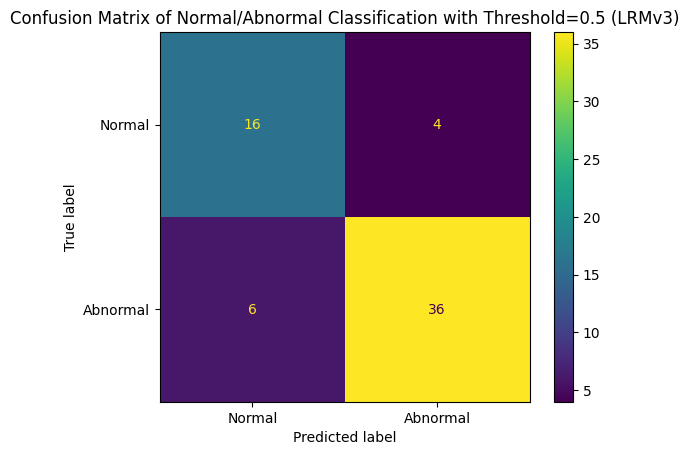

In [22]:
''' Analysis: Confusion Matrix with Threshold = 0.5'''
cm = confusion_matrix(y_test, prediction)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Normal','Abnormal'])

disp.plot()
plt.title('Confusion Matrix of Normal/Abnormal Classification with Threshold=0.5 (LRMv3)')
plt.show()

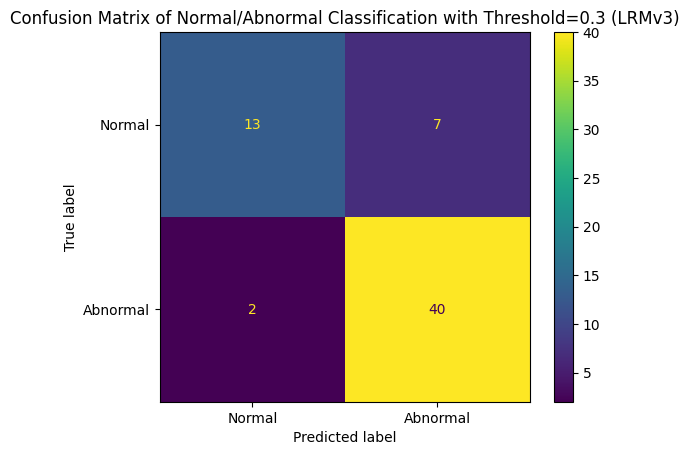

In [23]:
''' Analysis: Confusion Matrix with Threshold = 0.3'''

prediction = logit_model.predict(X_test, thres=0.3)


cm = confusion_matrix(y_test, prediction)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Normal','Abnormal'])

disp.plot()
plt.title('Confusion Matrix of Normal/Abnormal Classification with Threshold=0.3 (LRMv3)')
plt.show()

**

<h1> Challenge Section</h1>

This model will be modified from the logistic regression model v3

Steps:

1. Reformat dataset from binary class (0,1) to a binary matrix. E.g. [0,1,0] for sample 1 indiciates it is group 1
2. Change sigmoid function in softmax function
3. Change binary cross-entropy to categorical cross-entropy (loss function)

In [24]:
''' Data Cleansing '''

# Classify class data into Normal (0), Hernia (1), and Spondylilosthesis (2)
trinomial_y = pd.DataFrame(np.where(y =='Normal', [1,0,0], np.where(y =='Hernia', [0,1,0], [0,0,1])))

# Split training and testing data randomly (80-20 split)
y_train = trinomial_y.sample(frac=0.8, random_state=SEED)
y_test = trinomial_y.loc[trinomial_y.index.difference(y_train.index)]

# Reformat class data into suitable NumPy arrays
y_train = y_train.to_numpy()
y_test = np.argmax(y_test.to_numpy(), axis=1)

In [25]:
''' Implementation of the Softmax Regression Model'''

class SoftmaxRegression():

    '''
    Initialise the model.

    -params
    lr (float): Learning rate (or step size) of loss functions.
    max_epoch (int): Maximum number of epoch.
    tol (float): Tolerance level of weights and bias.
    '''
    def __init__(self, lr=0.0001, max_epoch=10000 , tol=0.01):
        self.lr = lr
        self.max_epoch = max_epoch
        self.weights = None
        self.tol = tol
        self.K = 3 # Number of classes
        self.bias = np.zeros(self.K) # Initial bias 
        self.dw_coeff_m = [] # Coefficient matrix of delta weights at each time step
        self.db_coeff = [] # Coefficient vector of delta bias at each time step
        self.iterations = 0 # Track number of iterations
        
        
        

    ''' Softmax Function.
    -params
    x (DataFrame): Linear combination of training data.
    -return
    DataFrame with updated probabilites. '''
    def _softmax(self, x):

        # Divide the exponent matrix with the sum of exponent matrix.
        # The sum of exponent matrix retains its original dimension, 
        # so the sum is repeated K times.
        return np.exp(x)/np.sum(np.exp(x), axis=1, keepdims=True)

    ''' Fits model with given training data.
    -params
    X (DataFrame): Training vector
    y (Array): Class vector 
    weights (Array): Custom initial weights for each feature'''
    
    def fit(self, X, y, weights=None):
        samples, features = X.shape
        # Initialise 0 weight for each dimension for each class K.
        # In this case, self.weights is a 6 X 3 matrix.
        # (Set data type to float64 to prevent precision loss)
        if weights is None:
            self.weights = np.zeros((features, self.K), dtype=np.float64)
        else:
            self.weights = weights

        for i in range(self.max_epoch+1):
            # Calculate w_t*x + b and apply sigmoid function.
            linear_prediction = np.dot(X, self.weights) + self.bias
            prediction = self._softmax(linear_prediction)
            #print(prediction)

            
            # Calculate weight and bias gradient.
            dw = (1/samples) * np.dot(X.T, (prediction - y))
            db = (1/samples) * np.sum(prediction - y)

            # Check if gradient is below tolerance threshold.
            if np.all(np.abs(dw) <= self.tol) and np.abs(db) <= self.tol:
                break
                
            # Calculate new weights and bias.
            self.weights = self.weights - self.lr*dw
            self.bias = self.bias - self.lr*db

            # Store weights of current time step
            self.dw_coeff_m.append(dw)
            self.db_coeff.append(db)
        self.iterations = i


    ''' Predicts classification with test data.
    -params
    X (DataFrame): Testing vector.
    -return
    Array of class predictions.'''
    def predict(self, X):
        linear_prediction = np.dot(X, self.weights) + self.bias
        prediction = self._softmax(linear_prediction)
        # Classify predictions as either Normal or Abnormal
        # according to the classification threshold.
        return np.argmax(prediction, axis=1)
        

    ''' Determines accuracy of classification.
    -params
    X (DataFrame): Testing vector.
    y (Array): Class vector.
    -return
    Float of percentage accuracy.
    '''
    def accuracy(self, X, y):
        prediction = self.predict(X)
        return np.sum(prediction==y)/len(y)

    ''' Getter for weights.
    -return 
    An array of weights for each dimension'''
    def get_weights(self):
        return self.weights

    ''' Getter for bias.
    -return 
    A float representing the bias value.'''
    def get_bias(self):
        return self.bias

    ''' Getter for delta weights.
    -return 
    An matrix of delta weights for each time step.'''
    def get_d_weights(self):
        return self.dw_coeff_m

    ''' Getter for delta bias.
    -return 
    A vector of delta bias for each time step.'''
    def get_d_bias(self):
        return self.db_coeff

    ''' Getter for number of iterations in the algorithm.
    -return
    An integer of number of iterations.'''
    def get_iters(self):
        return self.iterations
        

In [26]:
''' Initialise Softmax Regression Model'''
softmax_model = SoftmaxRegression(max_epoch=30000)

softmax_model.fit(X_train, y_train)

prediction = softmax_model.predict(X_test)


In [27]:
''' Statistics '''

print(f'Iterations: {softmax_model.get_iters()}\n')

accuracy = softmax_model.accuracy(X_test,y_test)
print(f'Accuracy: {accuracy*100:.2f}%')

Iterations: 10322

Accuracy: 91.94%


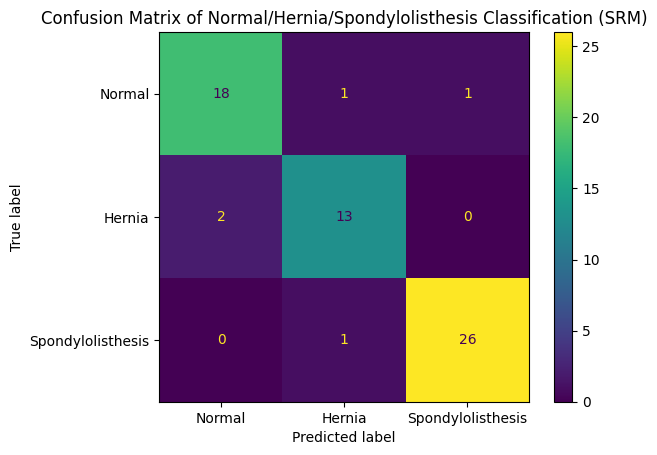

In [28]:
''' Analysis: Confusion Matrix'''
cm = confusion_matrix(y_test, prediction)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Normal','Hernia','Spondylolisthesis'])

disp.plot()
plt.title('Confusion Matrix of Normal/Hernia/Spondylolisthesis Classification (SRM)')
plt.show()